In [2]:
%matplotlib inline
from modelclass import *

Finding a model with a low value of $M$

In [20]:
Nd = 2

n_dq = 1

n_fermion = np.array(
    [[0,4,0,0,0],
    [7,0,0,0,0],
    [0,1,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_scalar = np.array(
    [[0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

MC = ModelClass(n_fermion, n_scalar, n_dq, Nd)

In [21]:
MC.UV.coeffs, MC.UV.fixed_point

([0.05305164769729842,
  1.9419893531448076,
  0.18997721932938333,
  -0.10610329539459684,
  0.46016704237561745,
  0.5066059182116889],
 array([-0.05589423,  0.29211054]))

In [31]:
alphas_UV = [0.1, 0.3]
L, M = MC.Lambda_dQCD_M(alphas_UV)
f'M = {M:.3e}, LdQCD = {L:.3e}'

'M = 2.548e+05, LdQCD = 1.150e+04'

Text(0, 0.5, '$\\alpha$')

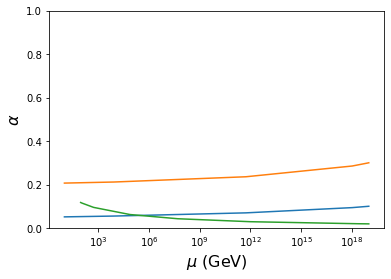

In [32]:
fig, ax = plt.subplots()

IR_evol_s = MC.EFT.coupling_evolution([cn.alpha_s_MZ, 0], cn.MZ, cn.mu_UV)
UV_evol = MC.UV.coupling_evolution(alphas_UV, cn.mu_UV, 1e1)

ax.plot(np.exp(UV_evol.t), UV_evol.y[0])
ax.plot(np.exp(UV_evol.t), UV_evol.y[1])
ax.plot(np.exp(IR_evol_s.t), IR_evol_s.y[0])

ax.set_ylim(0,1)
ax.set_xscale('log')

ax.set_xlabel(r'$\mu$ (GeV)', fontsize=16)
ax.set_ylabel(r'$\alpha$', fontsize=16)

Text(0, 0.5, '$\\alpha^{-1}$')

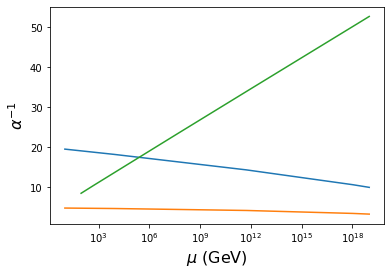

In [33]:
fig, ax = plt.subplots()

IR_evol_s = MC.EFT.coupling_evolution([cn.alpha_s_MZ, 0], cn.MZ, cn.mu_UV)
UV_evol = MC.UV.coupling_evolution(alphas_UV, cn.mu_UV, 1e1)

ax.plot(np.exp(UV_evol.t), 1/UV_evol.y[0])
ax.plot(np.exp(UV_evol.t), 1/UV_evol.y[1])
ax.plot(np.exp(IR_evol_s.t), 1/IR_evol_s.y[0])

# ax.set_ylim(0,1)
ax.set_xscale('log')

ax.set_xlabel(r'$\mu$ (GeV)', fontsize=16)
ax.set_ylabel(r'$\alpha^{-1}$', fontsize=16)